In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import re
import json

# https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})

In [36]:
records = [json.loads(line) for line in open("./res/bitly_usagov/example.txt", encoding="utf8")]
records[0]["tz"]

'America/New_York'

In [6]:
time_zones = [rec["tz"] for rec in recordes if "tz" in rec] # rec에 "tz"값이 있다면 추출
time_zones

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Europe/Madrid',
 'Asia/Kuala_Lumpur',
 'Asia/Nicosia',
 'America/Sao_Paulo',
 '',
 '',
 'Europe/London',
 'America/New_York',
 'Pacific/Honolulu',
 'America/Chicago',
 '',
 '',
 'Pacific/Honolulu',
 '',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/Chicago',
 'Europe/Rome',
 'America/New_York',
 'America/New_York',
 'America/Los_Angeles',
 '',
 '',
 'America/New_York',
 'America/New_York',
 'Europe/Malta',
 'America/New_York',
 'America/New_York',
 '',
 'America/Los_Angeles',
 'America/Sao_Paulo',
 '',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'Paci

In [7]:
len(time_zones)

3440

In [48]:
def get_counts(seq):
    counts = {}
    for s in seq:
        if s in counts:
            counts[s] += 1
        else:
            counts[s] = 1
    return counts
        
counts = get_counts(time_zones)
counts

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

## Dictionary 정렬1

In [49]:
import operator
sorted(counts.items(), key=operator.itemgetter(1), reverse=True)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33),
 ('Europe/Berlin', 28),
 ('Europe/Rome', 27),
 ('America/Rainy_River', 25),
 ('Europe/Amsterdam', 22),
 ('America/Phoenix', 20),
 ('America/Indianapolis', 20),
 ('Europe/Warsaw', 16),
 ('America/Mexico_City', 15),
 ('Europe/Paris', 14),
 ('Europe/Stockholm', 14),
 ('America/Vancouver', 12),
 ('Pacific/Auckland', 11),
 ('Asia/Hong_Kong', 10),
 ('Europe/Prague', 10),
 ('Europe/Moscow', 10),
 ('Europe/Helsinki', 10),
 ('America/Puerto_Rico', 10),
 ('Europe/Oslo', 10),
 ('America/Montreal', 9),
 ('Asia/Calcutta', 9),
 ('Asia/Istanbul', 9),
 ('Europe/Lisbon', 8),
 ('Asia/Bangkok', 6),
 ('Europe/Vienna', 6),
 ('Australia/NSW', 6),
 ('Chile/Continental', 6),
 ('America/Edmonton', 6),
 ('Europe/Athens', 6),
 ('Europe/Copenhagen', 5),
 ('America/Anch

## Dictionary 정렬2

In [54]:
counts = get_counts(time_zones)
vk = [(count, tz) for tz, count in counts.items()]
vk

[(1251, 'America/New_York'),
 (191, 'America/Denver'),
 (33, 'America/Sao_Paulo'),
 (16, 'Europe/Warsaw'),
 (521, ''),
 (382, 'America/Los_Angeles'),
 (10, 'Asia/Hong_Kong'),
 (27, 'Europe/Rome'),
 (2, 'Africa/Ceuta'),
 (35, 'Europe/Madrid'),
 (3, 'Asia/Kuala_Lumpur'),
 (1, 'Asia/Nicosia'),
 (74, 'Europe/London'),
 (36, 'Pacific/Honolulu'),
 (400, 'America/Chicago'),
 (2, 'Europe/Malta'),
 (8, 'Europe/Lisbon'),
 (14, 'Europe/Paris'),
 (5, 'Europe/Copenhagen'),
 (1, 'America/Mazatlan'),
 (3, 'Europe/Dublin'),
 (4, 'Europe/Brussels'),
 (12, 'America/Vancouver'),
 (22, 'Europe/Amsterdam'),
 (10, 'Europe/Prague'),
 (14, 'Europe/Stockholm'),
 (5, 'America/Anchorage'),
 (6, 'Asia/Bangkok'),
 (28, 'Europe/Berlin'),
 (25, 'America/Rainy_River'),
 (5, 'Europe/Budapest'),
 (37, 'Asia/Tokyo'),
 (6, 'Europe/Vienna'),
 (20, 'America/Phoenix'),
 (3, 'Asia/Jerusalem'),
 (3, 'Asia/Karachi'),
 (3, 'America/Bogota'),
 (20, 'America/Indianapolis'),
 (9, 'America/Montreal'),
 (9, 'Asia/Calcutta'),
 (1, 'E

In [55]:
vk.sort()
vk

[(1, 'Africa/Casablanca'),
 (1, 'Africa/Johannesburg'),
 (1, 'Africa/Lusaka'),
 (1, 'America/Argentina/Buenos_Aires'),
 (1, 'America/Argentina/Cordoba'),
 (1, 'America/Argentina/Mendoza'),
 (1, 'America/Caracas'),
 (1, 'America/Costa_Rica'),
 (1, 'America/La_Paz'),
 (1, 'America/Lima'),
 (1, 'America/Mazatlan'),
 (1, 'America/Monterrey'),
 (1, 'America/Montevideo'),
 (1, 'America/Santo_Domingo'),
 (1, 'America/St_Kitts'),
 (1, 'America/Tegucigalpa'),
 (1, 'Asia/Kuching'),
 (1, 'Asia/Manila'),
 (1, 'Asia/Nicosia'),
 (1, 'Asia/Novosibirsk'),
 (1, 'Asia/Pontianak'),
 (1, 'Asia/Riyadh'),
 (1, 'Asia/Yekaterinburg'),
 (1, 'Australia/Queensland'),
 (1, 'Europe/Ljubljana'),
 (1, 'Europe/Skopje'),
 (1, 'Europe/Sofia'),
 (1, 'Europe/Uzhgorod'),
 (1, 'Europe/Volgograd'),
 (2, 'Africa/Ceuta'),
 (2, 'America/Chihuahua'),
 (2, 'America/Guayaquil'),
 (2, 'America/Recife'),
 (2, 'Asia/Amman'),
 (2, 'Europe/Belgrade'),
 (2, 'Europe/Malta'),
 (2, 'Europe/Riga'),
 (2, 'Europe/Vilnius'),
 (3, 'Africa/Cair

In [56]:
vk.sort(reverse=True)
vk[:10]

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

## Dictionary 정렬3

In [129]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [73]:
frame = pd.DataFrame(records)
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [74]:
frame["tz"]

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                      NaN
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

In [75]:
frame["tz"].value_counts()

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Indianapolis                20
America/Phoenix                     20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
America/Puerto_Rico                 10
Europe/Helsinki                     10
Europe/Oslo                         10
Europe/Prague            

In [59]:
"" != np.NaN # "": 바구니에 과일이 없다, NaN: 바구니도 없다

True

In [78]:
frame[frame["tz"] == ""]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html
28,NaN,Mozilla/5.0 (iPad; CPU OS 5_0_1 like Mac OS X)...,en-us,None,NaN,vNJS4H,NaN,u0uD9q,1.319564e+09,1.usa.gov,NaN,o_4us71ccioa,NaN,0.0,direct,1.331923e+09,,https://www.nysdot.gov/rexdesign/design/commun...
29,NaN,Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X...,en-us,None,NaN,FPX0IM,NaN,FPX0IL,1.331923e+09,1.usa.gov,NaN,twittershare,NaN,1.0,http://t.co/5xlp0B34,1.331923e+09,,http://www.ed.gov/news/media-advisories/us-dep...
34,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"en-US,en;q=0.8",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,1.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
35,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",None,NaN,xOsMcy,NaN,yV8hww,1.331829e+09,1.usa.gov,NaN,wwpinc,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.army.mil/article/75464/Marksmanship...
37,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...,"en-us,en;q=0.5",None,NaN,vNJS4H,NaN,u0uD9q,1.319564e+09,1.usa.gov,NaN,o_4us71ccioa,NaN,1.0,direct,1.331923e+09,,https://www.nysdot.gov/rexdesign/design/commun...
46,NaN,BlackBerry8520/5.0.0.592 Profile/MIDP-2.1 Conf...,en,None,NaN,yD1K8w,NaN,AAEmdT,1.331756e+09,1.usa.gov,NaN,healthit,NaN,0.0,http://mobile.twitter.com/AIDSgov,1.331923e+09,,http://www.hhs.gov/live/?utm_source=ketchum&ut...
47,NaN,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,"en-us,en;q=0.5",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/home.php?,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...


In [66]:
len(frame[frame["tz"] == ""])

521

In [76]:
len(frame[frame["tz"].isnull()])

120

In [77]:
frame[frame["tz"].isnull()]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
13,1.331923e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,1.331923e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,1.331923e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,1.331923e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,1.331923e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,1.331923e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,1.331923e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,1.331923e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,1.331924e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,1.331924e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                  Missing
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

In [81]:
clean_tz.value_counts()

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Missing                            120
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Asia/Hong_Kong                      10
Europe/Oslo                         10
Europe/Prague            

In [84]:
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

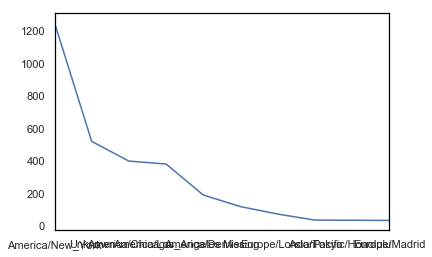

In [87]:
tz_counts[:10].plot()

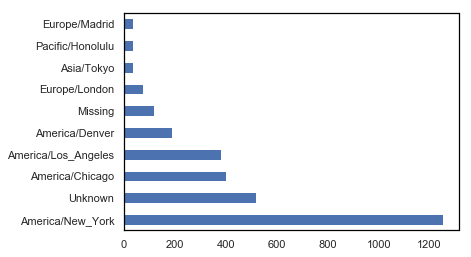

In [88]:
tz_counts[:10].plot(kind="barh")

In [89]:
frame.a.isnull().sum() # True=1, False=0

120

In [90]:
len(frame)

3560

In [91]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [92]:
len(frame.a.dropna())

3440

In [94]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [96]:
results.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
Dalvik/1.4.0                                            3
BlackBerry8520/5.0.0.592                                3
BlackBerry9630/5.0.0.975                                2
Socialite/7766                                          2
Goldfire                                                2
Acoon                                                   2
MOT-MB525/Blur_Version.34.4.709.MB525.Latam.en.01       1
Mozilla/0.6                                             1
BlackBerry8530/5.0.0.654                                1
ICE           

In [97]:
results.value_counts()[:5]

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
dtype: int64

In [101]:
cframe = frame[frame.a.notnull()]
len(cframe)

3440

In [102]:
cframe.a

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6       Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7       Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8       Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
10      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
11      Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...
12      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
14      Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...
15      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
16      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
17      Mozilla/5.0 (Macintosh; Intel Mac OS X 10.5; r...
18            

In [105]:
cframe.a.str.contains("Windows")

0        True
1       False
2        True
3       False
4        True
5        True
6        True
7        True
8       False
9        True
10       True
11      False
12       True
14       True
15       True
16       True
17      False
18      False
19       True
20       True
21      False
22       True
23      False
24       True
25       True
26       True
27      False
28      False
29      False
30       True
        ...  
3529     True
3530     True
3531    False
3532     True
3533    False
3534    False
3535     True
3536    False
3537     True
3538    False
3539    False
3540     True
3541    False
3542     True
3544     True
3545     True
3546    False
3547    False
3548    False
3549     True
3550     True
3551     True
3552     True
3553     True
3554     True
3555     True
3556     True
3557    False
3558    False
3559     True
Name: a, Length: 3440, dtype: bool

In [107]:
os = np.where(cframe.a.str.contains("Windows"), "Windows", "Not Windows")
os

array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], dtype='<U11')

In [110]:
cframe.groupby(["tz", os]) # tz를 기본으로 groupby를 하고 os 기준으로 정렬

In [112]:
cframe.groupby(["tz", os]).size()

tz                                         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window

## Pandas filter()

In [114]:
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [115]:
tips["size"].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [116]:
tips.groupby("size")

In [117]:
tips["size"].count()

244

In [120]:
# size 5, 6, 1 제외
# 그룹화된 각각의 객체가 x로 전달된다
tips_filtered = tips.groupby("size").filter(lambda x: x["size"].count() >= 30) 
tips_filtered

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [121]:
tips_filtered["size"].value_counts()

2    156
3     38
4     37
Name: size, dtype: int64

In [122]:
from datetime import datetime
# data:날짜, time: 시간, datetime: 날짜 + 시간

In [125]:
t1 = datetime.now()
print(t1)
t1

2019-07-12 13:38:24.730024


datetime.datetime(2019, 7, 12, 13, 38, 24, 730024)

In [127]:
t2 = datetime.today()
t2

datetime.datetime(2019, 7, 12, 13, 39, 35, 344074)

In [128]:
print(t1)
print(t2)

2019-07-12 13:38:24.730024
2019-07-12 13:39:35.344074


In [130]:
datetime(2019, 7, 12) # 자정을 나타내는 시간 객체 정보

datetime.datetime(2019, 7, 12, 0, 0)

In [131]:
datetime(2019, 8, 15) - datetime.now()

datetime.timedelta(days=33, seconds=37048, microseconds=27559)

In [134]:
type(datetime(2019, 8, 15) - datetime.now())

datetime.timedelta

In [136]:
datetime.now() - datetime(1993, 7, 15)

datetime.timedelta(days=9493, seconds=49439, microseconds=733184)

In [137]:
ebola = pd.read_csv("./res/country_timeseries.csv")
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


In [140]:
ebola["date_dt"] = pd.to_datetime(ebola["Date"])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(16), int64(1), object(1)
memory usag

In [142]:
test_df1 = pd.DataFrame({
    "order_day": ["07/12/19", "08/12/19", "09/12/19"]
})
test_df1

,order_day
0,07/12/19
1,08/12/19
2,09/12/19


In [143]:
pd.to_datetime(test_df1["order_day"]) # default

0   2019-07-12
1   2019-08-12
2   2019-09-12
Name: order_day, dtype: datetime64[ns]

In [146]:
pd.to_datetime(test_df1["order_day"], format="%m/%d/%y") # 맨 앞이 month, 가운데가 day, 마지막이 yaer다

0   2019-07-12
1   2019-08-12
2   2019-09-12
Name: order_day, dtype: datetime64[ns]

In [147]:
pd.to_datetime(test_df1["order_day"], format="%d/%m/%y") # 맨 앞이 day, 가운데가 month, 마지막이 year다

0   2019-12-07
1   2019-12-08
2   2019-12-09
Name: order_day, dtype: datetime64[ns]

In [150]:
pd.to_datetime(test_df1["order_day"], format="%y/%m/%d") # 맨 앞이 year, 가운데가 month, 마지막이 day다

0   2007-12-19
1   2008-12-19
2   2009-12-19
Name: order_day, dtype: datetime64[ns]

In [151]:
test_df2 = pd.DataFrame({
    "order_day": ["07-12-19", "08-12-19", "09-12-19"]
})
test_df2

,order_day
0,07-12-19
1,08-12-19
2,09-12-19


In [152]:
pd.to_datetime(test_df2["order_day"], format="%m-%d-%y")

0   2019-07-12
1   2019-08-12
2   2019-09-12
Name: order_day, dtype: datetime64[ns]

In [154]:
now = datetime.now()
print(now)

2019-07-12 14:21:58.065777


In [156]:
now.strftime("%y-%m-%d")

'19-07-12'

In [157]:
now.strftime("%Y-%m-%d")

'2019-07-12'

In [158]:
now.strftime("%H:%M:%S")

'14:21:58'

In [161]:
ebola1 = pd.read_csv("./res/country_timeseries.csv", 
                    parse_dates=["Date"])
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.2 KB


In [163]:
ebola1["Date"][0].year

2015

In [164]:
ebola1["Date"][0].month

1

In [165]:
ebola1["Date"][0].day

5

In [167]:
ebola1["date_dt"] = ebola1["Date"]
ebola1

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,2014-12-31
5,2014-12-28,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN,2014-12-28
6,2014-12-27,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,NaN,2732.0,NaN,NaN,NaN,NaN,NaN,2014-12-27
7,2014-12-24,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,NaN,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN,2014-12-24
8,2014-12-21,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,NaN,2582.0,NaN,NaN,NaN,NaN,NaN,2014-12-21
9,2014-12-20,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,1586.0,3384.0,2556.0,NaN,NaN,NaN,NaN,NaN,2014-12-20


In [173]:
ebola1["date_dt"].year

AttributeError: 'Series' object has no attribute 'year'

In [176]:
ebola1["year"] = ebola1["date_dt"].dt.year # 날짜 타입으로 변환

In [177]:
ebola1[["Date", "date_dt", "year"]].head()

,Date,date_dt,year
0,2015-01-05,2015-01-05,2015
1,2015-01-04,2015-01-04,2015
2,2015-01-03,2015-01-03,2015
3,2015-01-02,2015-01-02,2015
4,2014-12-31,2014-12-31,2014


In [178]:
ebola1["date_dt"].dt.month

0       1
1       1
2       1
3       1
4      12
5      12
6      12
7      12
8      12
9      12
10     12
11     12
12     12
13     12
14     12
15     11
16     11
17     11
18     11
19     11
20     11
21     11
22     11
23     11
24     11
25     11
26     11
27     11
28     11
29     10
       ..
92      5
93      5
94      5
95      5
96      5
97      5
98      5
99      4
100     4
101     4
102     4
103     4
104     4
105     4
106     4
107     4
108     4
109     4
110     4
111     4
112     4
113     4
114     3
115     3
116     3
117     3
118     3
119     3
120     3
121     3
Name: date_dt, Length: 122, dtype: int64

In [179]:
ebola1["date_dt"].dt.day

0       5
1       4
2       3
3       2
4      31
5      28
6      27
7      24
8      21
9      20
10     18
11     14
12      9
13      7
14      3
15     30
16     28
17     23
18     22
19     18
20     16
21     15
22     11
23     10
24      9
25      8
26      4
27      3
28      2
29     31
       ..
92     23
93     12
94     10
95      7
96      5
97      3
98      1
99     26
100    24
101    23
102    22
103    21
104    20
105    17
106    16
107    15
108    14
109    11
110     9
111     7
112     4
113     1
114    31
115    29
116    28
117    27
118    26
119    25
120    24
121    22
Name: date_dt, Length: 122, dtype: int64

In [182]:
ebola1.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


### 최초 발병일과 경과일

In [184]:
ebola1["date_dt"]

0     2015-01-05
1     2015-01-04
2     2015-01-03
3     2015-01-02
4     2014-12-31
5     2014-12-28
6     2014-12-27
7     2014-12-24
8     2014-12-21
9     2014-12-20
10    2014-12-18
11    2014-12-14
12    2014-12-09
13    2014-12-07
14    2014-12-03
15    2014-11-30
16    2014-11-28
17    2014-11-23
18    2014-11-22
19    2014-11-18
20    2014-11-16
21    2014-11-15
22    2014-11-11
23    2014-11-10
24    2014-11-09
25    2014-11-08
26    2014-11-04
27    2014-11-03
28    2014-11-02
29    2014-10-31
         ...    
92    2014-05-23
93    2014-05-12
94    2014-05-10
95    2014-05-07
96    2014-05-05
97    2014-05-03
98    2014-05-01
99    2014-04-26
100   2014-04-24
101   2014-04-23
102   2014-04-22
103   2014-04-21
104   2014-04-20
105   2014-04-17
106   2014-04-16
107   2014-04-15
108   2014-04-14
109   2014-04-11
110   2014-04-09
111   2014-04-07
112   2014-04-04
113   2014-04-01
114   2014-03-31
115   2014-03-29
116   2014-03-28
117   2014-03-27
118   2014-03-26
119   2014-03-

In [188]:
ebola1["date_dt"].min()

Timestamp('2014-03-22 00:00:00')

In [191]:
ebola1["outbreak_d"] = ebola1["date_dt"] - ebola1["date_dt"].min() # 경과일
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
year                   122 non-null int64
outbreak_d           

In [192]:
ebola1.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt,year,outbreak_d
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05,2015,289 days
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04,2015,288 days
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03,2015,287 days
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02,2015,286 days
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,...,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,2014-12-31,2014,284 days


## 시계열 분석

In [198]:
banks = pd.read_csv("./res/banklist.csv", parse_dates=[5, 6])
banks_no_dates = pd.read_csv("./res/banklist.csv")
banks_no_dates.info()
print()
banks.info()
banks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null object
Updated Date             555 non-null object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null datetime64[ns]
Updated Date             555 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05


In [199]:
banks["Closing Date"].dt.year

0      2017
1      2017
2      2017
3      2017
4      2017
5      2017
6      2017
7      2017
8      2016
9      2016
10     2016
11     2016
12     2016
13     2015
14     2015
15     2015
16     2015
17     2015
18     2015
19     2015
20     2015
21     2014
22     2014
23     2014
24     2014
25     2014
26     2014
27     2014
28     2014
29     2014
       ... 
525    2008
526    2008
527    2008
528    2007
529    2007
530    2007
531    2004
532    2004
533    2004
534    2004
535    2003
536    2003
537    2003
538    2002
539    2002
540    2002
541    2002
542    2002
543    2002
544    2002
545    2002
546    2002
547    2002
548    2002
549    2001
550    2001
551    2001
552    2001
553    2000
554    2000
Name: Closing Date, Length: 555, dtype: int64

In [200]:
banks["Closing Date"].dt.quarter # 몇 사분기에 해당하는지 출력

0      4
1      4
2      2
3      2
4      2
5      1
6      1
7      1
8      3
9      3
10     2
11     2
12     1
13     4
14     4
15     3
16     2
17     1
18     1
19     1
20     1
21     4
22     4
23     4
24     4
25     3
26     3
27     2
28     2
29     2
      ..
525    2
526    1
527    1
528    4
529    3
530    1
531    2
532    1
533    1
534    1
535    4
536    2
537    1
538    4
539    4
540    3
541    2
542    2
543    1
544    1
545    1
546    1
547    1
548    1
549    3
550    3
551    2
552    1
553    4
554    4
Name: Closing Date, Length: 555, dtype: int64

In [201]:
banks["closing_quarter"], banks["closing_year"] = banks["Closing Date"].dt.quarter, banks["Closing Date"].dt.year

In [206]:
closing_year = banks.groupby(["closing_year"]).size()
closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

In [208]:
closing_year_q = banks.groupby(["closing_year", "closing_quarter"]).size()
closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

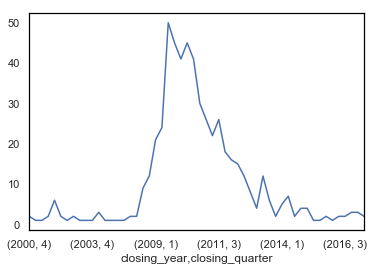

In [216]:
closing_year_q.plot()

## 수치값 → 범위로 나누어서 카테고리화
* cut()
* qcut()

In [222]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 100]
# 1 - 15, 16 - 25, ..., 60 - 99
bins = [1, 15, 25, 35, 60, 99]
labels = ["유아", "청소년", "청년", "중년", "노년"]
data = pd.cut(ages, bins, labels = labels)
type(data)

pandas.core.arrays.categorical.Categorical

In [223]:
data

[NaN, 유아, 유아, 청소년, 청소년, ..., 노년, 청소년, 중년, 청년, NaN]
Length: 12
Categories (5, object): [유아 < 청소년 < 청년 < 중년 < 노년]

In [224]:
data.codes

array([-1,  0,  0,  1,  1,  3,  2,  4,  1,  3,  2, -1], dtype=int8)

In [225]:
df = pd.DataFrame(ages, columns=["ages"])

In [226]:
df["age_data"] = pd.cut(ages, bins, labels = labels)
df

,ages,age_data
0,0,NaN
1,2,유아
2,10,유아
3,21,청소년
4,23,청소년
5,37,중년
6,31,청년
7,61,노년
8,20,청소년
9,41,중년


In [228]:
data = np.random.randn(100)
pd.qcut(data, 4, labels=["A1", "A2", "A3", "A4"])

[A2, A3, A1, A4, A2, ..., A2, A3, A3, A4, A2]
Length: 100
Categories (4, object): [A1 < A2 < A3 < A4]